# Rozpoznawanie obrazu
Ostatnia aktualizacja: 2021.01.14

In [34]:
#from keras.datasets import mnist as dataset
from keras.datasets import cifar10 as dataset
import numpy as np

In [35]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

### Wizualizacja danych
Zanim zaczniemy cokowliek robić z naszymi danymi, warto zobaczyć, jak wyglądają. Na dobry początek wypiszmy sobie kształty naszych zbiorów danych oraz  wydrukujmy pierwszy element zbioru treningowego (funkcja print) i jego etykietę. 

In [36]:
print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape)) 

X_train: (50000, 32, 32, 3), y_train: (50000, 1)
X_test: (10000, 32, 32, 3), y_test: (10000, 1)


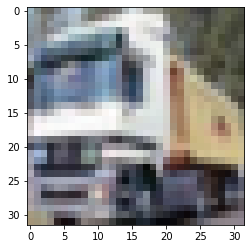

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1]) 

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  [102 101  99]
  [125 131 139]
  [155 166 180]
  [172 190 210]
  [180 199 214]
  [142 156 156]
  [111 120 110]
  [106 107  98]
  [109 104 102]
  [123 121 117]
  [127 129 127]
  [181 188 189]
  [217 226 229]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  [124 129 132]
  [150 161 173]
  [152 164 175]
  [174 188 200]
  [178 189 196]
  [134 139 137]
  [110 111 102]
  [133 127 120]
  [163 156 156]
  [192 192 187]
  [218 219 215]
  [240 241 238]
  [245 246 245]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  [147 153 159]
  [138 150 162]
  [132 145 154]
  [170 184 190]
  [178 189 192]
  [171 176 175]
  [192 195 189]
  [219 218 217]
  [234 233 238]
  [229 237 235]
  [239 245 242]
  [244 244 242]
  [246 242 241]]

 [[136 147 155]
  [137 142 146]
  [122 121 121]
  [132 133 139]
  [151 157 167]
  [181 193 198]
  [203 222 224]
  [208 227 230]
  [208 223 225]
  [203 219 217]
  [179 194 198]
  [169 184 196]
  [164 186 190]
  [125 141 143]
  

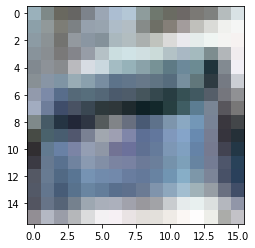

In [13]:
image_slice = X_train[1][0:16, 0:16, :]
plt.imshow(image_slice, cmap = 'gray')
print(image_slice)

Train data


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


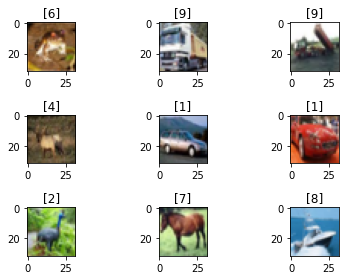

Test data


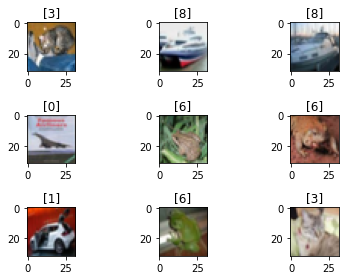

In [14]:
print("Train data")
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(y_train[i])
  plt.tight_layout()
  plt.imshow(X_train[i], cmap = 'gray')
plt.show()

print("Test data")
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(y_test[i])
  plt.tight_layout()
  plt.imshow(X_test[i], cmap = 'gray')
plt.show()

In [16]:
np.unique(y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

### Klasyfikacja SVM'em

In [31]:
#SVM - prosty ale długo się uczy
#train_count = 10000 #aby ograniczyć czas uczenia
#X_train = X_train[0:train_count]
#y_train = y_train[0:train_count]

np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [32]:
X_train.reshape(X_train.shape[0], 32*32*3).shape

(50000, 3072)

In [17]:
from sklearn import svm

classifier = svm.SVC(gamma = 0.1, kernel = 'poly') #gamma i kernel najlepsze wg internetu 
classifier.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train.reshape(y_train.shape[0])) #ze względu na to, że dane są 3 wymiarowe (10000, 28, 28) -> (10000, 784)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 32*32*3))

In [19]:
print(y_pred[:20])
print(y_test[:20])

[3 8 0 8 4 6 1 2 5 9 0 1 5 7 9 8 7 5 8 6]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[582  49  91  25  49  29  23  41 123  51]
 [ 39 614  15  28  12  14  17  29  81 175]
 [ 78  16 419 103 162 112 116  77  33  18]
 [ 18  28  98 353  78 211 148  76  38  39]
 [ 36  13 114  67 454  85  93  76  26  19]
 [ 31  25  93 216  68 403  84  85  30  28]
 [ 21  13  77  88  79  50 481  22   8  20]
 [ 30  27  62  64  65  65  18 543  15  43]
 [113  60  13  26  22   8  10   9 592  61]
 [ 52 155  18  30  11  23  10  42  54 546]]
0.4987


### Klasyfikacja CNN'em


#### Przygotowanie danych

Dla porządku wczytajmy jeszcze raz dane, czyli wczytujemy je do X_train, y_train, X_test, y_test używając metody load_data.  

In [40]:
#from keras.datasets import mnist as dataset
from keras.datasets import cifar10 as dataset
import numpy as np

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [41]:
print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

print(type(X_train[0]))
print(type(X_train[0][0][0][0]))

X_train: (50000, 32, 32, 3), y_train: (50000, 1)
X_test: (10000, 32, 32, 3), y_test: (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


Sieć szybciej się nauczy na danych o wartościach w zakresie 0-1 niż 0-255, więc musimy je znormalizować. Przeróbmy dane treningowe i testowe tak, żeby miały wartości w zakresie 0-1 zamiast 0-255. Następnie sprawdźmy typ pojedynczego pixela. 


In [42]:
#Sieci są przystosowane do działania na FLOAT z zakresu 0-1
X_train = X_train / 255
X_test = X_test / 255
print(type(X_train[0][0][0][0]))

<class 'numpy.float64'>


Domyślna konfiguracja Keras korzysta z 32-bitowych float'ów. Jak w trakcie treningu będziemy podawać sieci 64-bitowe tablice, będzie dużo niepotrzebnego kopiowania, alokowania pamięci, itp. Dlatego przed treningiem zadbajmy o to, żeby nasze dane treningowe i testowe były w formacie 32-bitowym (numpy, metoda astype). 


In [44]:
#Powyżej powstały float jest 64 bitowy, sieć i tak by go zamieniła w 32 bitowy, więc lepiej się z góry przystosować
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(type(X_train[0][0][0][0]))

<class 'numpy.float32'>


Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (score dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot zamiast tego będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

w keras.utils.np_utils mamy funcję to_categorical, która nam zrobi konwersję. Wyniki wpiszmy do zmiennych Y_train i Y_test (duże litery bo macierze). 

In [45]:
# Sieć oczekuje, aby etykiety były wektorem o wielkości = ilości klas
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(Y_train[0], y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [6]


Ostatnia sprawa. Conv2D przyjmuje obrazki w postaci tablicy wielowymiarowej - nie spłaszczamy danych do postaci wektora tak jak w przypadku SVM'a, bo nasz filtr / kernel działa na danych 'przestrzennych' - szerokość x wysokość x liczba kanałów.  
W przypadku zdjęć 200 x 200 pixeli w RGB, każdy obrazek byłby tablicą o wymiarach 200 x 200 x 3 (lub 3 x 200 x 200 zależnie od tego jak przechowujemy dane).  
Tutaj mamy 1 bajt na pixel i obrazek o wymiarach przestrzennych 28 x 28. Zatem nasze dane powinny mieć wymiary 28 x 28 x 1 (czyli ostatnia wartość nie może być liczbą, tylko tablicą przechowującą liczbę).

Czyli musimy wcisnąć 1 wymiar. Gdzie go wciskamy, zależy od konfiguracji. 

```python
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
 ```
 

In [46]:
from keras import backend as K                                                                                       # W PRACY DOMOWEJ TRZEBA BĘDZIE ZAKTUALIZOWAĆ DO 3 KANAŁÓW
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

#### Przygotowanie sieci

We wszystkich Conv2D zrobimy kernel 3x3 i aktywację 'relu'.
We wszystkich MaxPooling2D robimy pool_size 2x2

Zróbmy sobie taki model (może być Sequential): 
- Na wejściu Conv2D (musimy podać input_shape - mamy go w zmiennej input_shape)
- MaxPooling2D
- Conv2D, 32 filtry
- MaxPooling2D
- Flatten (spłaszczamy dane do 1-wymiarowego wektora)
- [Dense (czyli tzw. fully connected)](https://keras.io/layers/core/), 128 units, activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
- Na wyjściu Dense, units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Na pewno przydadzą się te importy: 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [129]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout

model = Sequential([
  Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),         #32 filtry (do poeksperymentowania potem) ; input_shape później już nie podaje
  MaxPooling2D(pool_size = (2, 2)),                                                         #2x2 zmniejsza o połowe obrazek
  Conv2D(32, kernel_size = (3, 3), activation = 'relu'),                                    #mw 14x14x32 - wymiary wejściowe, bo 28x28x1 -> 28x28x32 -> 14x14x32
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.1),
  Flatten(),                                      #weźmie wielowymiarowy obrazek i zrobi z tego wektor
  Dense(128, activation = 'relu'),                #warstwy gęste, fully connected
  Dense(10, activation = 'softmax')
])

Mamy obiekt 'model', teraz musimy uruchomić metodę 'compile', która przygotuje nas do treningu. Spróbujmy loss 'categorical_crossentropy', optimizer 'adam'. Argument metric przyjmuje tablicę stringów, będziemy chcieli 'accuracy'. 

In [130]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#### Trening


In [131]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 126) #batch_size - ile próbek na raz dajemy do sieci

Epoch 1/20
397/397 [==============================] - 3s 6ms/step - loss: 1.8664 - accuracy: 0.3088
Epoch 2/20
397/397 [==============================] - 2s 5ms/step - loss: 1.3369 - accuracy: 0.5217
Epoch 3/20
397/397 [==============================] - 2s 6ms/step - loss: 1.1711 - accuracy: 0.5833
Epoch 4/20
397/397 [==============================] - 2s 6ms/step - loss: 1.0646 - accuracy: 0.6249
Epoch 5/20
397/397 [==============================] - 2s 6ms/step - loss: 0.9904 - accuracy: 0.6532
Epoch 6/20
397/397 [==============================] - 2s 6ms/step - loss: 0.9410 - accuracy: 0.6715
Epoch 7/20
397/397 [==============================] - 2s 5ms/step - loss: 0.8879 - accuracy: 0.6913
Epoch 8/20
397/397 [==============================] - 2s 5ms/step - loss: 0.8410 - accuracy: 0.7070
Epoch 9/20
397/397 [==============================] - 2s 5ms/step - loss: 0.8077 - accuracy: 0.7153
Epoch 10/20
397/397 [==============================] - 2s 5ms/step - loss: 0.7863 - accuracy: 0.7276

#### Ewaluacja
Zobaczmy, jak nasz model sobie radzi: model.evaluate()

In [132]:
scores = model.evaluate(X_test, Y_test)
print(scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.8418 - accuracy: 0.7191
0.7190999984741211


Przyjrzyjmy się konkretnym przypadkom: model.predict_classes, zapiszmy sobie do wektora y_pred

In [133]:
y_pred = model.predict_classes(X_test)
print(y_pred[:10])
print(y_test[:10])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[5 8 8 0 4 6 1 2 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


Zobaczmy, na których instancjach testowych sobie nie radzi. Możemy na przykład porównać y_pred z y_test (operator !=). W wyciągnięciu indeksów pomyłkowych instancji pomoże nam funkcja numpy nonzero. Zapiszmy sobie te indeksy do zmiennej false_pred i wypiszmy jej zawartość. 

In [69]:
y_pred.shape
y_test.shape

(10000, 1)

In [74]:
false_pred = np.nonzero(y_pred != y_test.reshape(y_test.shape[0]))[0]
print(false_pred)

[   2    4    6 ... 9993 9995 9998]


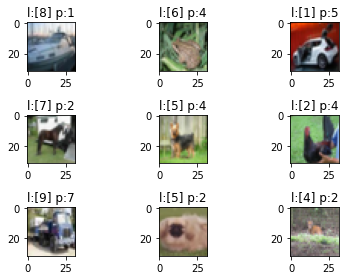

In [75]:
import matplotlib.pyplot as plt

for i in range(9):
  instance_index = false_pred[i]
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))
  plt.imshow(X_test[instance_index].reshape(32, 32, 3), cmap = 'gray')

Accuracy oraz confusion matrix dla 256 batch_size oraz 40 epoch

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[674  16  53  16  19  14   9   9  47  22]
 [ 37 824  11  23   3   8   9   7  53 113]
 [ 77  14 620  92 114  76  72  48  19  17]
 [ 25  15  59 491  71 194  61  44  16  18]
 [ 27   6  85  72 607  58  46  86  13  10]
 [  7   4  58 147  35 519  19  62   9  13]
 [ 13  11  49  65  58  36 750  12   7   9]
 [  5   6  35  48  64  72  12 697   2  23]
 [ 85  31  18  19  23  13  15  10 793  45]
 [ 50  73  12  27   6  10   7  25  41 730]]
0.6705


Accuracy oraz confusion matrix dla 256 batch_size oraz 30 epoch

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[784  26  99  45  49  31   7  45  74  65]
 [ 25 853  12  22  11   7  12  19  49 145]
 [ 42   9 515  57  67  53  47  32  16  10]
 [ 11  13  68 493  57 175  50  42  16  12]
 [ 13   2  79  62 626  44  39  37   9   6]
 [ 11   4  81 161  41 573  29  58   4   9]
 [ 13   7  73  76  42  33 787  10   6   7]
 [ 11   4  41  46  88  64  10 744   6  16]
 [ 71  21  21  15  14  10  11   4 796  29]
 [ 19  61  11  23   5  10   8   9  24 701]]
0.6872


Accuracy oraz confusion matrix dla 256 batch_size oraz 20 epoch

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[825  25  88  33  34  21  13  23 114  52]
 [ 32 874  14  19   8   7  12   8  77 190]
 [ 40  11 604  98 109  55  83  41  17   9]
 [  9   6  43 470  56 130  63  25   6  15]
 [  7   4  67  62 627  46  63  58  11   4]
 [ 10   4  88 201  45 655  39  64  11  11]
 [  6   6  37  38  34  14 703   6   2   6]
 [ 12   9  46  56  76  61  11 769  10  39]
 [ 43  18   6  13   9   6   9   1 739  22]
 [ 16  43   7  10   2   5   4   5  13 652]]
0.6918


Accuracy oraz confusion matrix dla 126 batch_size oraz 20 epoch

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[712  24  63  20  14  21   5  19  50  36]
 [ 25 802   9  16   5   6   7   4  30  65]
 [ 57   6 562  41  57  32  43  17  12   7]
 [ 28  13  96 603  93 251  98  53  19  23]
 [ 28   8  90  79 670  49  48  63   7   9]
 [  6   5  55 125  37 542  25  38   7   3]
 [ 11  11  43  31  30  17 744   2   8   5]
 [ 13   2  53  46  79  60  13 778  10  14]
 [ 92  38  18  21  14  16  12   6 833  41]
 [ 28  91  11  18   1   6   5  20  24 797]]
0.7043


Accuracy oraz confusion matrix dla 126 batch_size oraz 10 epoch

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[728  22  65  30  29  22   6  19  58  48]
 [ 33 852   7  25   6   5  10  18  49 167]
 [ 72  17 658 124 143 114  91  59  13  22]
 [ 10  11  48 483  60 177  66  30  15  13]
 [ 10   2  71  57 570  36  33  48   6   4]
 [  9   4  54 153  30 551  25  61   6   5]
 [ 10   7  40  57  57  18 755   9   4  14]
 [ 14   3  30  35  85  55   6 736   3  21]
 [ 89  43  21  26  19  20   8   7 834  47]
 [ 25  39   6  10   1   2   0  13  12 659]]
0.6826


Accuracy oraz confusion matrix dla 126 batch_size oraz 10 epoch + dodana warstwa Dropout(0.1) po warstwach konwolucyjnych (przed Flatten())

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[720  17  56  13  10  15   6  11  46  19]
 [ 26 811   8  15   5   5   8   9  35  67]
 [ 42   3 526  35  40  37  34  17   7   8]
 [  7   7  57 475  46 122  70  30   8  11]
 [ 42  12 149 114 767  71  90  82  13   8]
 [ 11   7  92 223  38 658  54  62  10  12]
 [  6   5  39  32  24  10 711   5   1   3]
 [ 17   4  43  44  53  56   9 756   4  13]
 [ 76  40  14  24  13  11   7   5 849  37]
 [ 53  94  16  25   4  15  11  23  27 822]]
0.7095


Accuracy oraz confusion matrix dla 126 batch_size oraz 10 epoch + dodana warstwa Dropout(0.1) po warstwach konwolucyjnych (przed Flatten()) + zmieniona ilość filtrów w pierwszej warstwie konwolucyjnej na 64

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[786  22  63  27  21  17   8  20  72  34]
 [ 18 877  13  15   8   4  11   7  40 123]
 [ 57   2 602  66  59  36  42  37  13  13]
 [ 17  13  72 562  88 174  83  42  16  23]
 [ 15   4  67  42 639  37  14  45   3   6]
 [  8   5  62 161  42 626  29  62   6   8]
 [  6   5  69  47  52  31 799   5   3   5]
 [  8   2  27  49  76  60   3 765   1  13]
 [ 58  27  15  17  13  11   8   4 830  37]
 [ 27  43  10  14   2   4   3  13  16 738]]
0.7224


Accuracy oraz confusion matrix dla 126 batch_size oraz 10 epoch + dodana warstwa Dropout(0.1) po pierwszej warstwie Pooling + zmieniona ilość filtrów w pierwszej warstwie konwolucyjnej na 64

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[733  17  60  22  21  12   5  17  71  31]
 [ 18 826   6  13   5   5   7   2  39  84]
 [ 87  19 593  68  85  52  38  38  28  16]
 [ 14   9  52 441  38 121  40  34  12  12]
 [ 18   4  67  69 640  45  25  71   6   3]
 [ 13   7 102 242  82 688  42 116  14  12]
 [ 12  10  76  87  63  34 830  10  15  11]
 [  8   2  24  32  52  26   6 687   3  21]
 [ 57  21  10  14  10   9   5   6 778  26]
 [ 40  85  10  12   4   8   2  19  34 784]]
0.7


Patrząć na metrykę 'accuracy' model konwulycjnych sieci neuronowych wypadł o wiele lepiej niż SVM. W przypadku SVM osiągnięty został poziom accuracy = 0.4987 na danych testowych, gdy sieci neuronowe osiągały tą metryke na poziomie 0.67+, a dodatkowo czas uczenia był o wiele dłuższy niż w przypadku sieci neuronowych. Jeżeli chodzi o konwolucyjne sieci neuronowe, to przetestowałem je z różnymi parametrami "batch_size", ilość "epoch" oraz różnymi architekturami sieci, których wyniki z konkretnymi kombinacjami budowy są podane powyżej. W pierwszym kroku sprawdzałem dla jakich wartości "batch_size" oraz "epoch" model daje najtrafniejsze predykcje - batch_size = 126 oraz epochs = 20. W przypadku robienia więcej niż 20 powtórzeń (epoch) algorytm widać, że się przeuczał ponieważ jego accuracy na danych treningowych ciągle wzrastało wręcz do 1.0 a na testowych ulegało pogorszeniu. Następnie przetestowałem jaka będzie jakość klasyfikacji po dodaniu warstwy upuszczającej jakąś część informacji (Dropout), która też ma przeciwdziałać przeuczaniu się modelu, spróbowałem dać ją w dwóch miejscach w architekturze sieci: 1. Bezpośrednio przed warstwą spłaszczającą dane do wektora (Flatten) oraz 2. Bezpośrednio po pierwszej wartswie Pooling. Lepsza okazała się opcja 1. dla której również przetestowałem zmianę liczby filtrów w pierwszej sieci konwolucyjnej z 32 na 64, co okazało się trafne i polepszyło jakość modelu.  Finalna kombinacja: 126 batch_size, 10 epoch + dodana warstwa Dropout(0.1) po warstwach konwolucyjnych (przed Flatten()) + zmieniona ilość filtrów w pierwszej warstwie konwolucyjnej na 64 poskutkowała trafnością (accuracy) na poziomie 0.7224 w porównaniu do wyniku 0.6705 dla najgorszej sieci neuronowej której architektura pozostała taka sama jak w przypadku sieci konwolucyjnych z zajęć a "batch_size" oraz "epochs" wyniosiły odpowiednio 256 oraz 40. 